In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("dataset.csv",low_memory=False)

print(data.shape)

(4424, 35)


In [20]:
# Check if the target column exists
target_column = "Target"  # Replace with the actual target column name
if target_column in data.columns:
    print(f"The target column '{target_column}' exists in the dataset.")
else:
    print(f"The target column '{target_column}' does NOT exist in the dataset.")

The target column 'Target' exists in the dataset.


Target column unique values: [0 1 2]
Target column value counts:
 Target
1    2209
0    1421
2     794
Name: count, dtype: int64


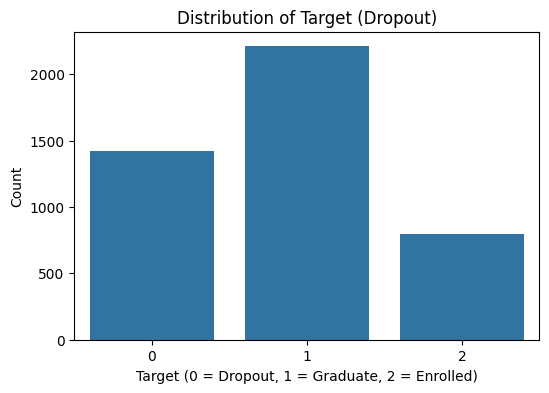

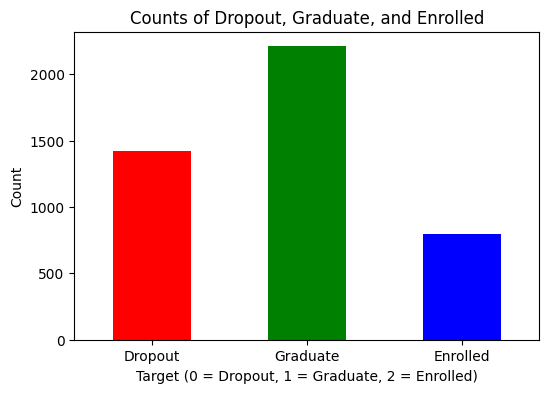

Numeric data columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem 

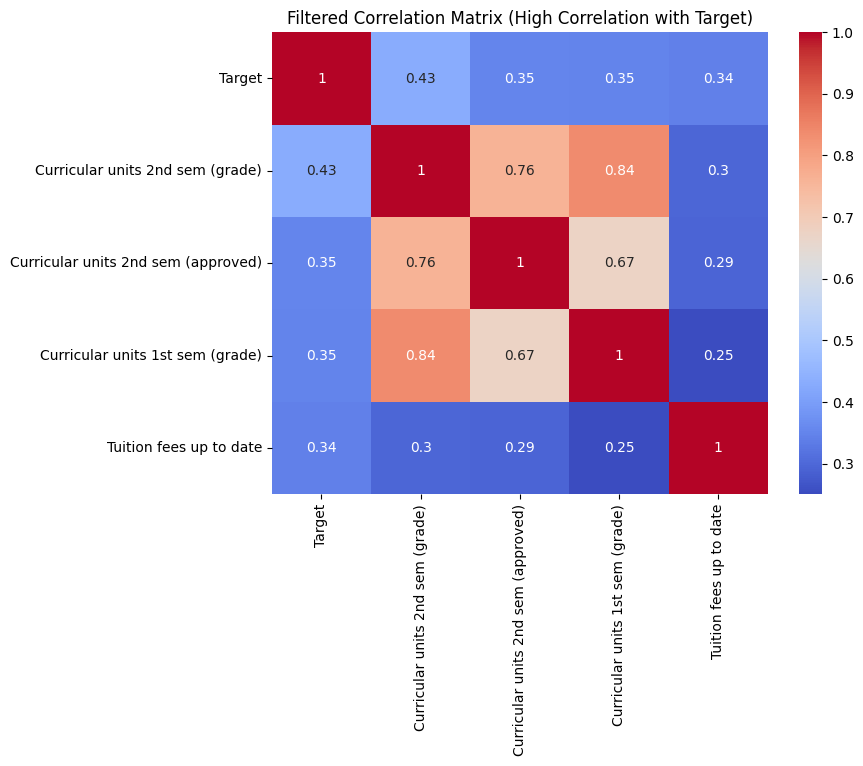

In [21]:

# Encode the Target column to numerical values
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
if 'Target' in data.columns:
    data['Target'] = data['Target'].map(target_mapping)
else:
    raise ValueError("The 'Target' column is missing from the dataset.")

# Debugging: Check the Target column after mapping
print("Target column unique values:", data['Target'].unique())
print("Target column value counts:\n", data['Target'].value_counts())

# Visualize the distribution of the Target column
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target (Dropout)')
plt.xlabel('Target (0 = Dropout, 1 = Graduate, 2 = Enrolled)')
plt.ylabel('Count')
plt.show()

# Add a bar graph for Dropout, Graduate, and Enrolled
if not data['Target'].isnull().all():
    plt.figure(figsize=(6, 4))
    data['Target'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])
    plt.title('Counts of Dropout, Graduate, and Enrolled')
    plt.xlabel('Target (0 = Dropout, 1 = Graduate, 2 = Enrolled)')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Graduate', 'Enrolled'], rotation=0)
    plt.show()
else:
    print("The Target column is empty or contains only NaN values.")

# Ensure numeric_data is defined by selecting only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

# Debugging: Check if numeric_data is populated
print("Numeric data columns:", numeric_data.columns)

# Calculate correlations with the Target column
if 'Target' in numeric_data.columns:
    correlations_with_target = numeric_data.corr()['Target'].sort_values(ascending=False)

    # Display the correlations
    print("\nCorrelations with Target:")
    print(correlations_with_target)

    # Filter columns with high correlation (absolute value > 0.3 as an example threshold)
    high_correlation_columns = correlations_with_target[abs(correlations_with_target) > 0.3].index
    print("\nColumns with high correlation to Target:")
    print(high_correlation_columns)

    # Visualize the filtered correlation matrix
    if len(high_correlation_columns) > 1:  # Ensure there are enough columns to create a matrix
        plt.figure(figsize=(8, 6))
        filtered_correlation_matrix = numeric_data[high_correlation_columns].corr()
        sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Filtered Correlation Matrix (High Correlation with Target)')
        plt.show()
    else:
        print("Not enough highly correlated columns to create a correlation matrix.")
else:
    print("The 'Target' column is missing from numeric_data.")


Correlations within Dropout subset:
Curricular units 1st sem (approved)               0.203145
Curricular units 1st sem (enrolled)               0.199131
Curricular units 2nd sem (approved)               0.191854
Curricular units 2nd sem (enrolled)               0.189754
Curricular units 1st sem (evaluations)            0.179951
Curricular units 2nd sem (evaluations)            0.179801
Curricular units st sem (credited)                0.168566
Curricular units 2nd sem (credited)               0.166750
Curricular units 2nd sem (grade)                  0.162342
Curricular units 1st sem (grade)                  0.161237
Mother's qualification                            0.068232
Mother's occupation                               0.065571
Application mode                                  0.065513
Age at enrollment                                 0.062864
Father's qualification                            0.061269
Previous qualification                            0.056514
Course             

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')


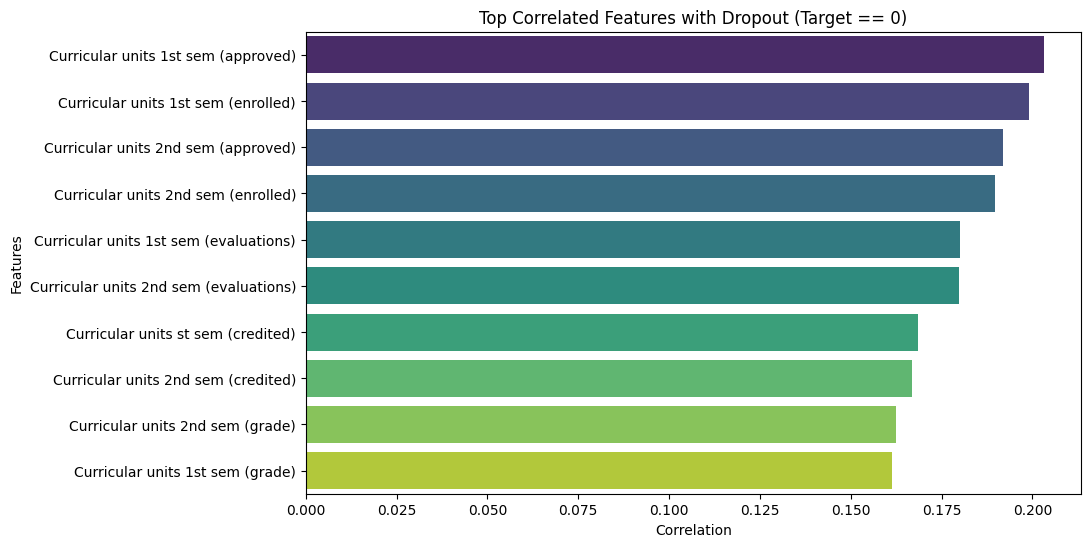


Boxplots for Top Correlated Features:


/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


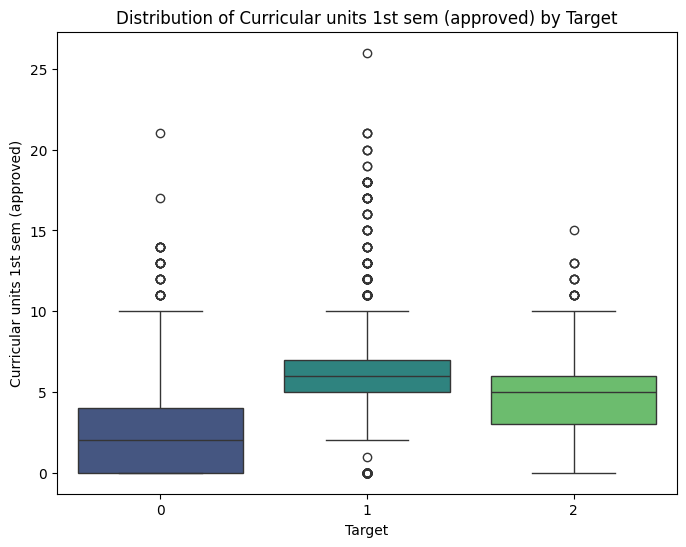

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


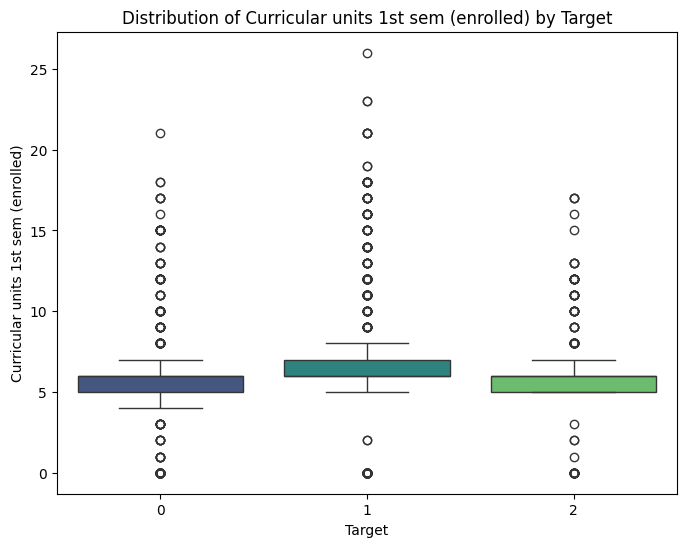

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


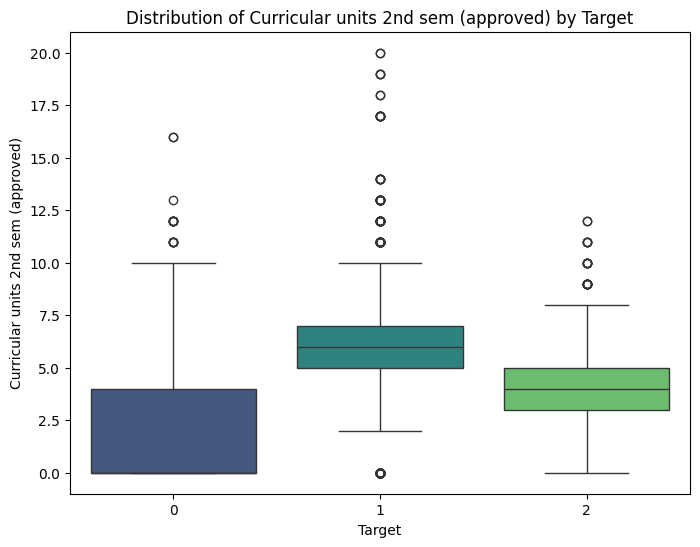

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


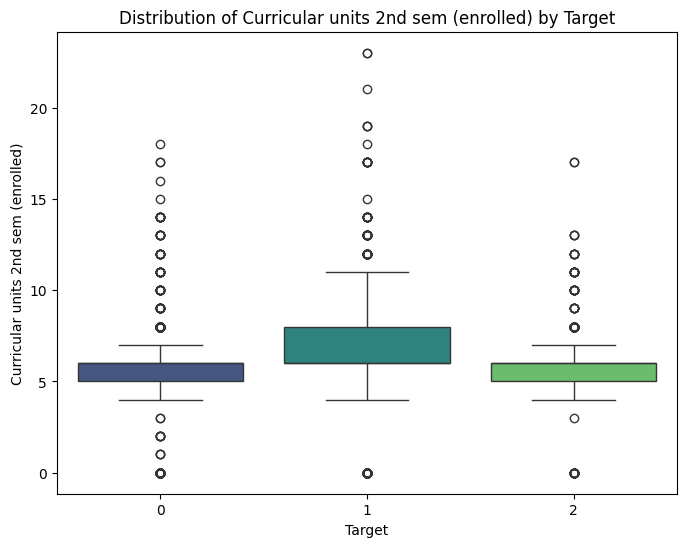

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


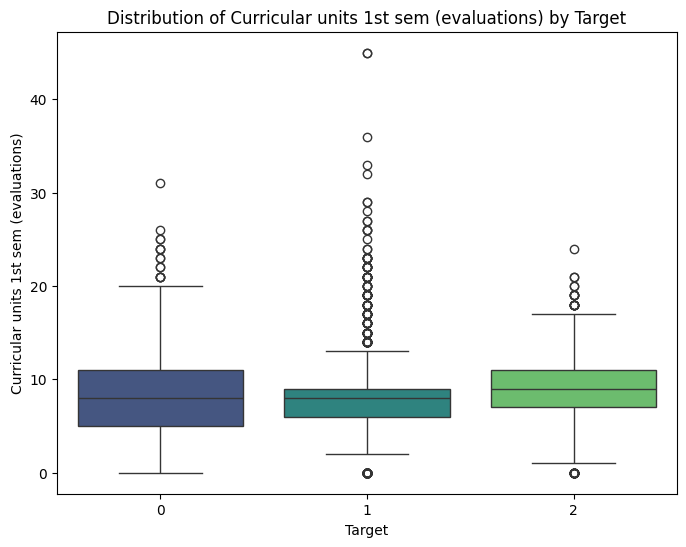

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


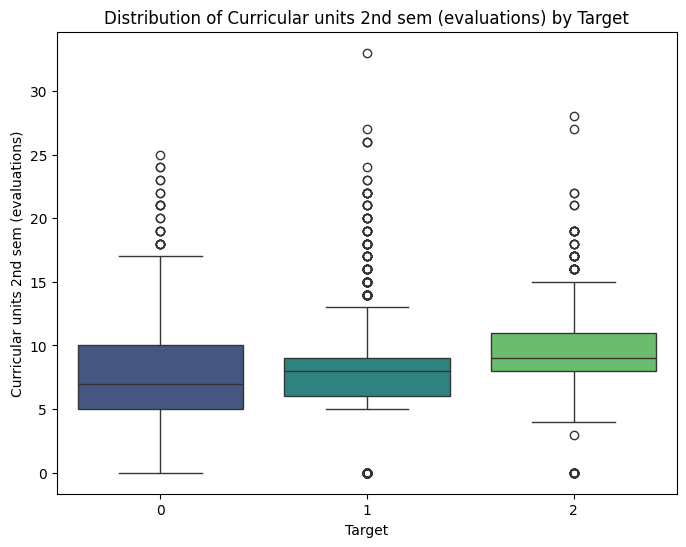

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


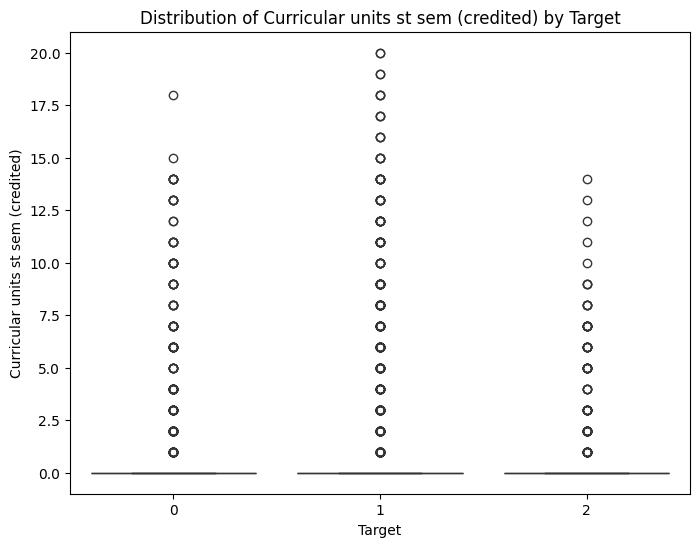

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


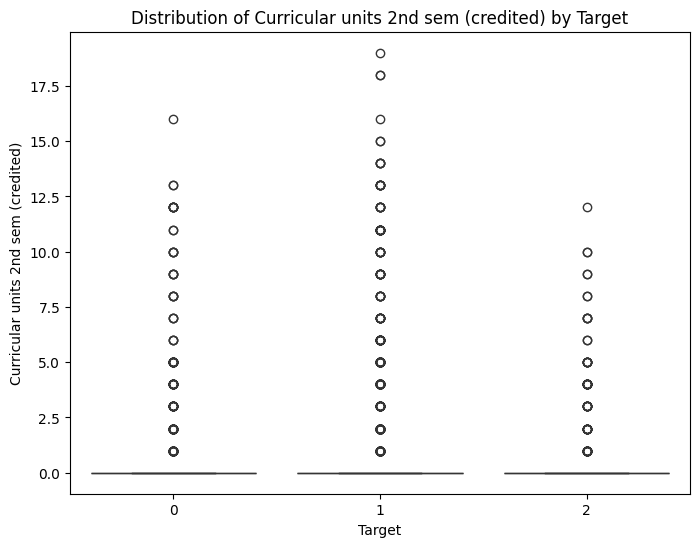

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


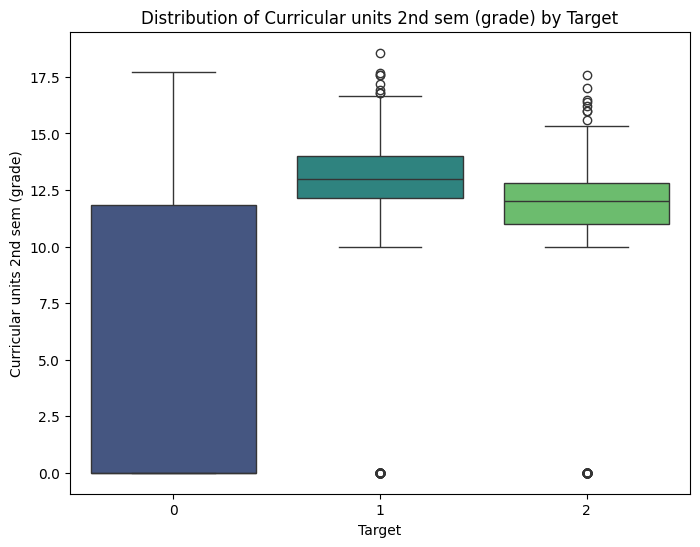

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


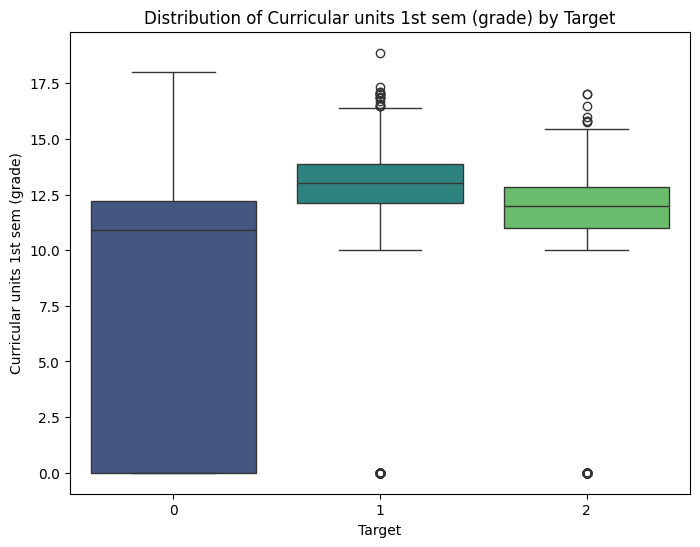

/var/folders/7q/_2x3tw5j1s57gqds6vmfltvr0000gn/T/ipykernel_14813/31143184.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


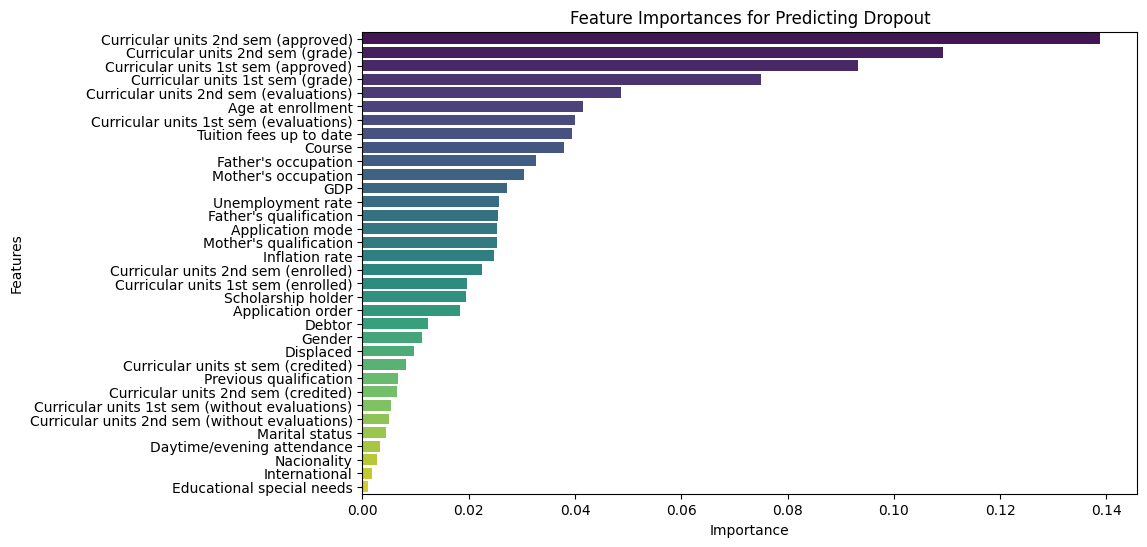


Heatmap for Top Correlated Features:


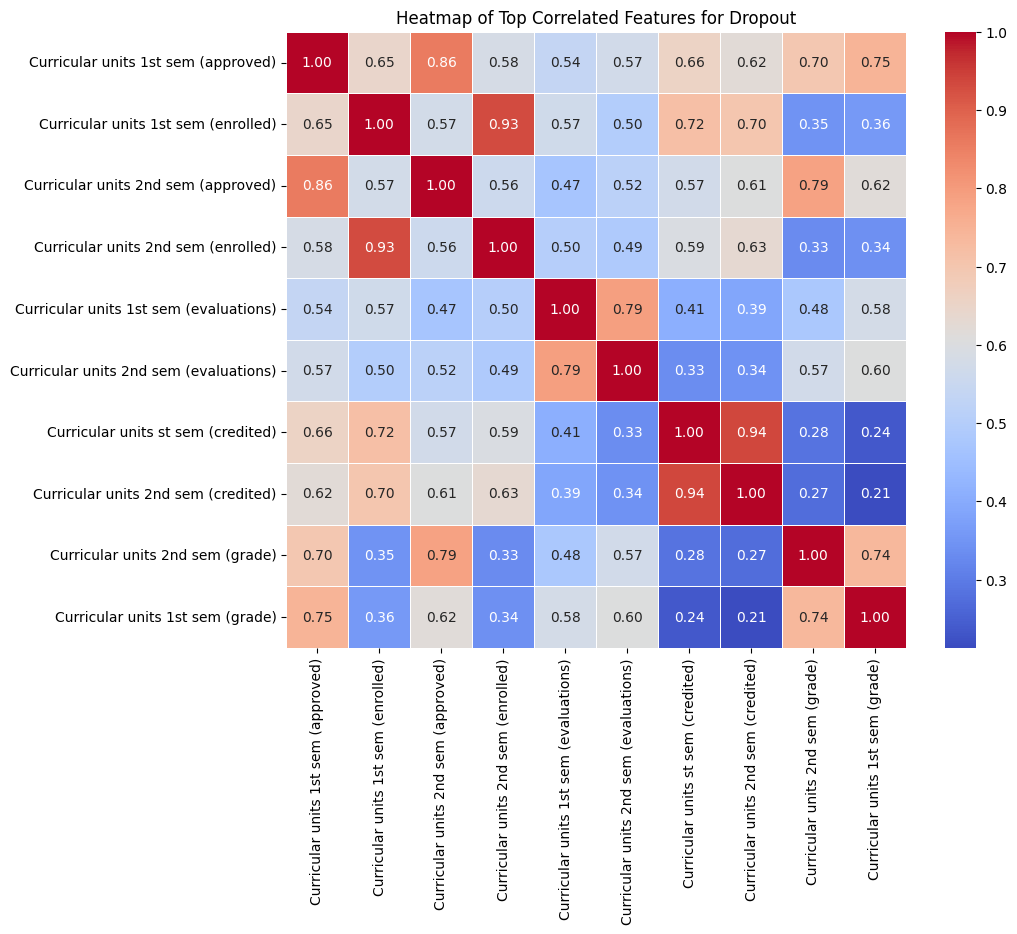

In [22]:

# Filter the dataset for Dropout (Target == 0)
dropout_data = data[data['Target'] == 0]

# Calculate correlations for Dropout subset
dropout_numeric_data = dropout_data.select_dtypes(include=['number'])  # Select only numeric columns
correlations_with_dropout = dropout_numeric_data.corr().mean().sort_values(ascending=False)

# Display the correlations
print("\nCorrelations within Dropout subset:")
print(correlations_with_dropout)

# Visualize the top correlated features with Dropout
top_correlated_features = correlations_with_dropout.head(10).index  # Top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')
plt.title('Top Correlated Features with Dropout (Target == 0)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# 1. Boxplots for Feature Distributions by Target
print("\nBoxplots for Top Correlated Features:")
for feature in top_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

# 2. Feature Importance Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for Random Forest
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances for Predicting Dropout')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 3. Heatmap for Top Correlated Features
print("\nHeatmap for Top Correlated Features:")
plt.figure(figsize=(10, 8))
filtered_correlation_matrix = dropout_numeric_data[top_correlated_features].corr()
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Top Correlated Features for Dropout')
plt.show()


Training CNN with kernel size 3...
Epoch 1/100


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5713 - loss: 1.3198 - val_accuracy: 0.3912 - val_loss: 0.9802
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7117 - loss: 0.8545 - val_accuracy: 0.4393 - val_loss: 0.8953
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7222 - loss: 0.8078 - val_accuracy: 0.7331 - val_loss: 0.6820
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7145 - loss: 0.8411 - val_accuracy: 0.7444 - val_loss: 0.6242
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7025 - loss: 0.8816 - val_accuracy: 0.7712 - val_loss: 0.6098
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7306 - loss: 0.7528 - val_accuracy: 0.7613 - val_loss: 0.5835
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7582 - loss: 0.7160 - val_accuracy: 0.7726 - val_loss: 0.5815
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7590 - loss: 0.7014 - val_accuracy: 0.7768 - val_loss: 0.5

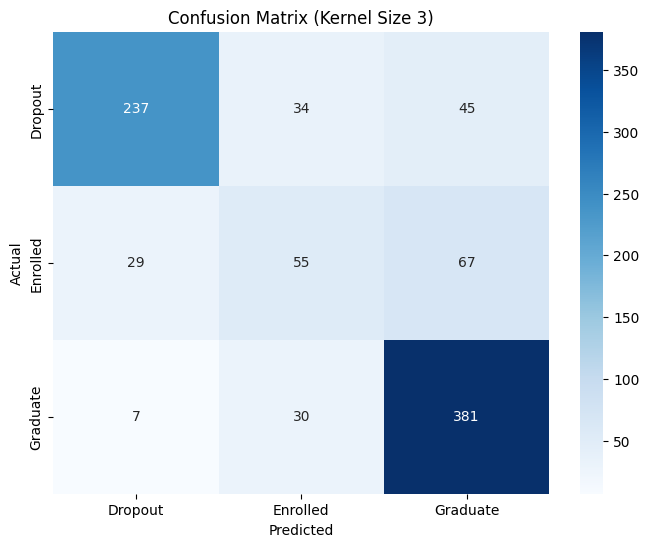


Training CNN with kernel size 5...
Epoch 1/100


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5609 - loss: 1.3516 - val_accuracy: 0.6992 - val_loss: 0.8804
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6683 - loss: 0.9753 - val_accuracy: 0.7458 - val_loss: 0.7737
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7156 - loss: 0.8337 - val_accuracy: 0.7556 - val_loss: 0.6303
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7264 - loss: 0.7830 - val_accuracy: 0.7613 - val_loss: 0.5966
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.8231 - val_accuracy: 0.7684 - val_loss: 0.5847
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7465 - loss: 0.7277 - val_accuracy: 0.7726 - val_loss: 0.5836
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7488 - loss: 0.6943 - val_accuracy: 0.7627 - val_loss: 0.5938
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7557 - loss: 0.6990 - val_accuracy: 0.7684 - val_loss: 0.6

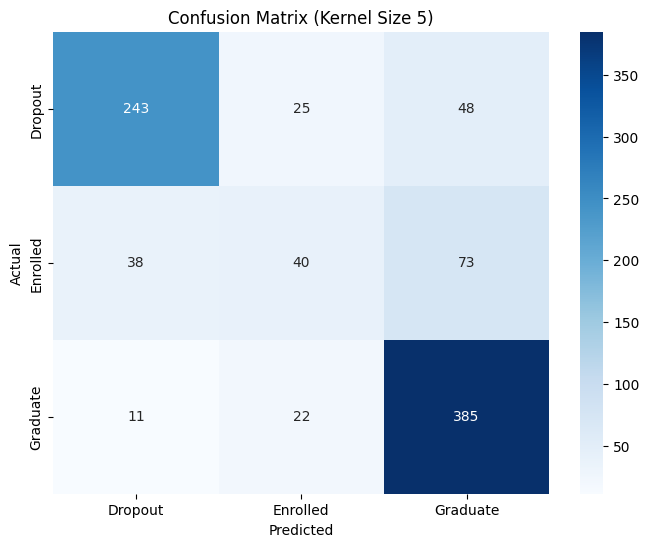


Training CNN with kernel size 7...
Epoch 1/100


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5510 - loss: 1.2545 - val_accuracy: 0.4520 - val_loss: 0.9950
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6644 - loss: 0.9240 - val_accuracy: 0.5932 - val_loss: 0.8767
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.8815 - val_accuracy: 0.5325 - val_loss: 0.8742
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.7976 - val_accuracy: 0.7218 - val_loss: 0.6832
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7361 - loss: 0.7137 - val_accuracy: 0.7387 - val_loss: 0.6295
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 0.7483 - val_accuracy: 0.7599 - val_loss: 0.6044
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7574 - loss: 0.7323 - val_accuracy: 0.7712 - val_loss: 0.5983
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.7384 - val_accuracy: 0.7585 - val_loss: 0.6

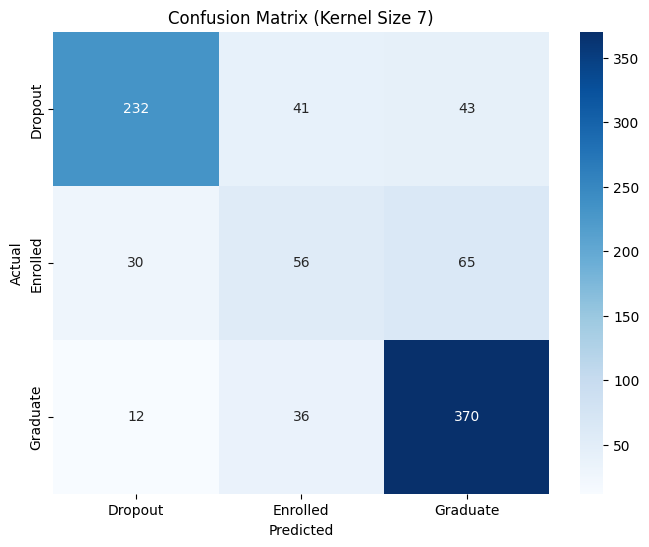


Comparison of Results:
Kernel Size 3: Accuracy = 0.7839, Precision = 0.7539, Recall = 0.7605, F1-Score = 0.7519
Kernel Size 5: Accuracy = 0.7684, Precision = 0.7350, Recall = 0.7548, F1-Score = 0.7364
Kernel Size 7: Accuracy = 0.7627, Precision = 0.7398, Recall = 0.7435, F1-Score = 0.7382


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("dataset.csv")

# Separate features and target
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target

# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for CNN input (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Function to build an improved CNN model
def build_cnn(kernel_size):
    model = Sequential([
        Conv1D(64, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        Dropout(0.3),
        Conv1D(128, kernel_size=kernel_size, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Experiment with fixed and varying kernel sizes
kernel_sizes = [3, 5, 7]  # Example kernel sizes
results = {}

for kernel_size in kernel_sizes:
    print(f"\nTraining CNN with kernel size {kernel_size}...")
    model = build_cnn(kernel_size)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    print(f"\nClassification Report for kernel size {kernel_size}:")
    report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
    print(classification_report(y_test_classes, y_pred_classes))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f'Confusion Matrix (Kernel Size {kernel_size})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Store results
    results[kernel_size] = {
        'accuracy': history.history['val_accuracy'][-1],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

# Compare results across kernel sizes
print("\nComparison of Results:")
for kernel_size, metrics in results.items():
    print(f"Kernel Size {kernel_size}: Accuracy = {metrics['accuracy']:.4f}, Precision = {metrics['precision']:.4f}, Recall = {metrics['recall']:.4f}, F1-Score = {metrics['f1_score']:.4f}")